# SARIMA (Seasonal ARIMA) Model

This notebook demonstrates the implementation of the SARIMA (Seasonal ARIMA) Model.

SARIMA extends the ARIMA model by incorporating seasonal components, making it suitable for time series data with repeating patterns over regular intervals (e.g., monthly, quarterly, or yearly). The SARIMA model combines:

- **Autoregression (AR)**: Captures relationships between the current observation and past observations (lags).
- **Differencing (I)**: Removes trends or seasonality to make the series stationary.
- **Moving Average (MA)**: Models the relationship between the observation and the residual errors from previous lags.
- **Seasonal Components (SAR, SI, SMA)**: Accounts for repeating patterns or seasonality at specific intervals.

The steps involved include:

- **Data Preprocessing**: Preparing the dataset to identify seasonality and trends.
- **Stationarity Testing**: Using the Dickey-Fuller test to ensure the series is stationary.
- **Seasonal Component Identification**: Recognizing the seasonal frequency and adjusting parameters accordingly.
- **Model Fitting**: Applying the SARIMA model to capture both trend and seasonal variations.
- **Forecasting**: Generating future predictions while considering seasonality.
- **Evaluation**: Validating the model's performance by comparing predicted values with actual data.

The focus is on accurately modeling time series data with strong seasonal behavior and leveraging these patterns for reliable forecasting.


# Step 1 & 2: Loading the Dataset and Identifying Time Series Columns

### Step 1: Loading the Dataset
- I loaded the dataset from an Excel file located at `'../datasets/master_dataset/master_dataset.xlsx'` using the `pandas` library.
- The dataset was stored in the variable `data` for further processing.

### Step 2: Identifying Time Series Columns
- I selected three numeric columns for time series analysis:
  - **Clicks**: Number of clicks recorded over time.
  - **Impressions**: Number of impressions generated over time.
  - **Quantity**: The primary target column for forecasting.
- These columns were stored in the `time_series_columns` list for easy iteration.


In [5]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller

# Step 1: Load the dataset
data = pd.read_excel('../datasets/master_dataset/master_dataset.xlsx')

# Step 2: Identify numeric time series columns
time_series_columns = ["Clicks", "Impressions", "Quantity"]

# Steps 3 to 9: Performing SARIMA Analysis

In this section, I analyzed each time series column, applied the SARIMA model, and forecasted future values.

### Step 3: Iterating Over Time Series Columns
- I looped through each column (`Clicks`, `Impressions`, `Quantity`) to perform the SARIMA analysis individually.
- For each column:
  - Missing values were removed using `.dropna()` to ensure the data was clean.
  - I displayed the first 5 rows of the column to inspect the data.


### Step 4: Visualizing the Time Series
- I plotted the time series for each column to understand trends, seasonality, and potential anomalies.
- The x-axis represents `Day Index`, and the y-axis represents the column's values.
- This visualization provided a clear understanding of the data’s behavior over time.

### Step 5: Testing for Stationarity
- I used the **Augmented Dickey-Fuller (ADF) Test** to check whether the time series was stationary:
  - If the `p-value` was greater than 0.05, the data was non-stationary, so I applied **differencing** to make it stationary.
  - For stationary data, no adjustments were needed.
- The transformed data was displayed to verify the stationarity process.

### Step 6: Fitting the SARIMA Model
- I applied the SARIMA model with the following parameters:
  - `(p, d, q)` for non-seasonal components set to `(1, 1, 1)`.
  - `(P, D, Q, s)` for seasonal components set to `(1, 1, 1, 12)` to capture monthly seasonality.
- The model was trained using the `.fit()` method, and the summary was printed to understand the results.

### Step 7: Making Predictions
- Using the fitted SARIMA model, I predicted values for the observed time points:
  - Predictions were made using `.predict()`.
  - I compared the **Actual** vs. **Predicted** values by creating a DataFrame and displaying the first 5 rows.
  - A plot was generated to visualize the comparison, with the actual data shown in blue and predictions in red.

### Step 8: Forecasting Future Values
- I forecasted the next 5 values for each time series using the `.forecast()` method.
- The forecast results provided insights into the expected behavior of the data for future time points.

### Step 9: Visualizing Forecast Results
- I plotted the forecasted values alongside the original time series to observe how well the model captured the data’s seasonal patterns:
  - The original data was plotted in blue, and the forecasted values were plotted in red.
- This visualization helped validate the model’s ability to forecast seasonal trends.


*** Analyzing column: Clicks ***

First 5 rows of Clicks:
 0    445
1    433
2    424
3    427
4    451
Name: Clicks, dtype: int64


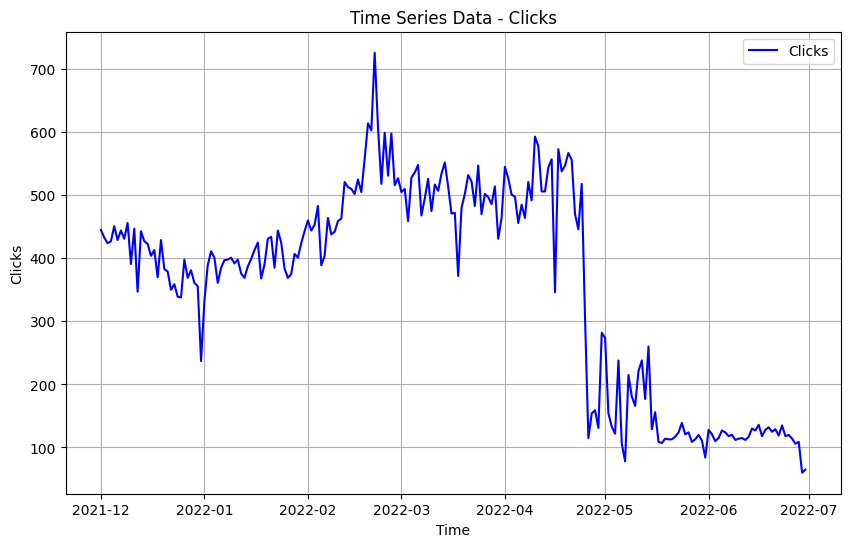

Dickey-Fuller Test Statistic: -0.8705717270828215
p-value: 0.797509057499528
The column: Clicks is non-stationary. Applying differencing...

First 5 rows of differenced Clicks:
 1   -12.0
2    -9.0
3     3.0
4    24.0
5   -22.0
Name: Clicks, dtype: float64


c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as 

SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                             Clicks   No. Observations:                  211
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1079.881
Date:                            Wed, 27 Nov 2024   AIC                           2169.762
Time:                                    00:29:35   BIC                           2186.203
Sample:                                         0   HQIC                          2176.416
                                            - 211                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2882      0.042     -6.909      0.000      -0.370      -0.206
ma.L1        

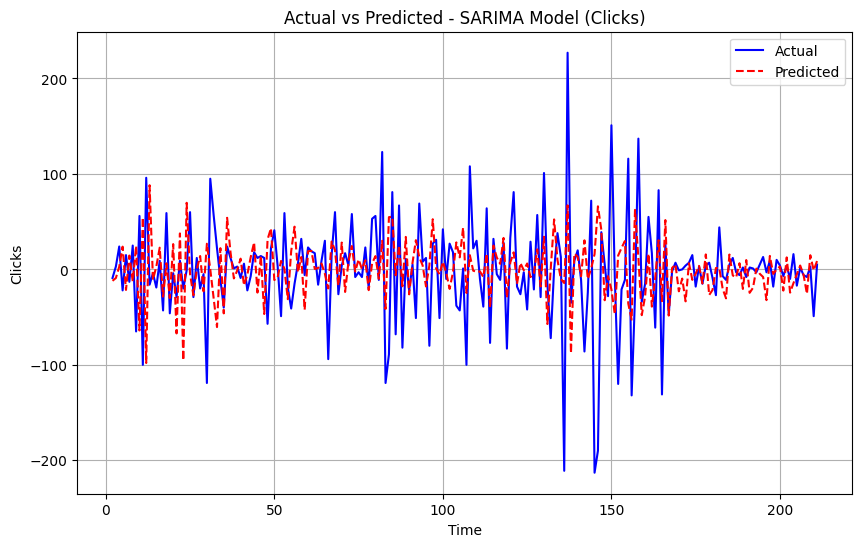


Forecasted Values for Clicks:
 211     2.669555
212   -20.728904
213    14.269952
214   -26.126447
215    -9.633283
Name: predicted_mean, dtype: float64


c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


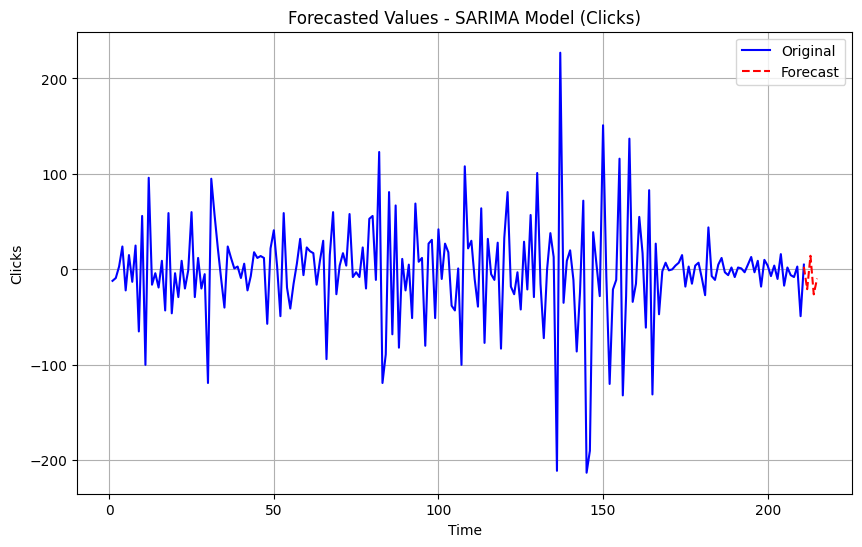


*** Analyzing column: Impressions ***

First 5 rows of Impressions:
 0    620
1    890
2    851
3    881
4    678
Name: Impressions, dtype: int64


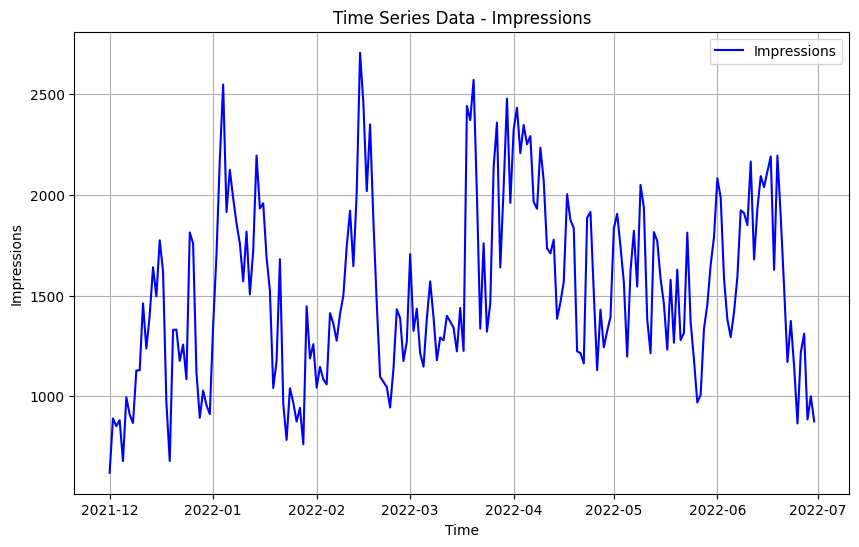

Dickey-Fuller Test Statistic: -5.6962061101258685
p-value: 7.863580125889645e-07
Impressions is stationary.
SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                        Impressions   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -1435.528
Date:                            Wed, 27 Nov 2024   AIC                           2881.056
Time:                                    00:29:36   BIC                           2897.522
Sample:                                         0   HQIC                          2887.720
                                            - 212                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------

c:\Users\nitin\OneDrive\Documents\Infosys Springboard Internship Files\NitinMishra-Infosys-Nov24\python files\.venv\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


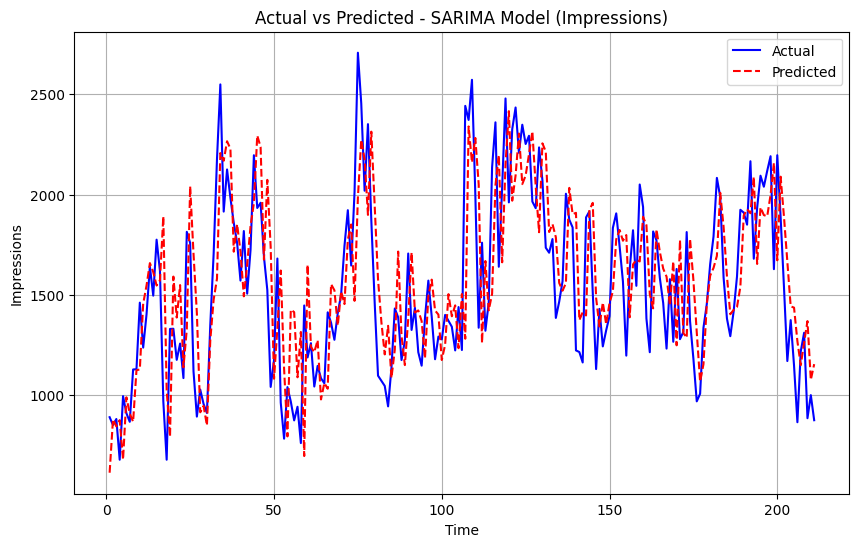


Forecasted Values for Impressions:
 212    1128.794768
213    1184.552868
214    1260.719653
215    1344.435773
216    1504.754345
Name: predicted_mean, dtype: float64


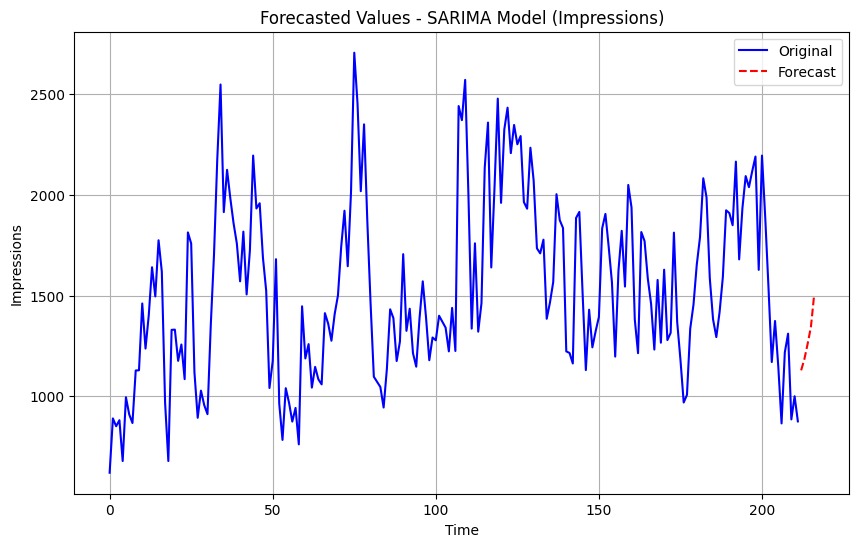


*** Analyzing column: Quantity ***

First 5 rows of Quantity:
 0    14
1    10
2    13
3    22
4    33
Name: Quantity, dtype: int64


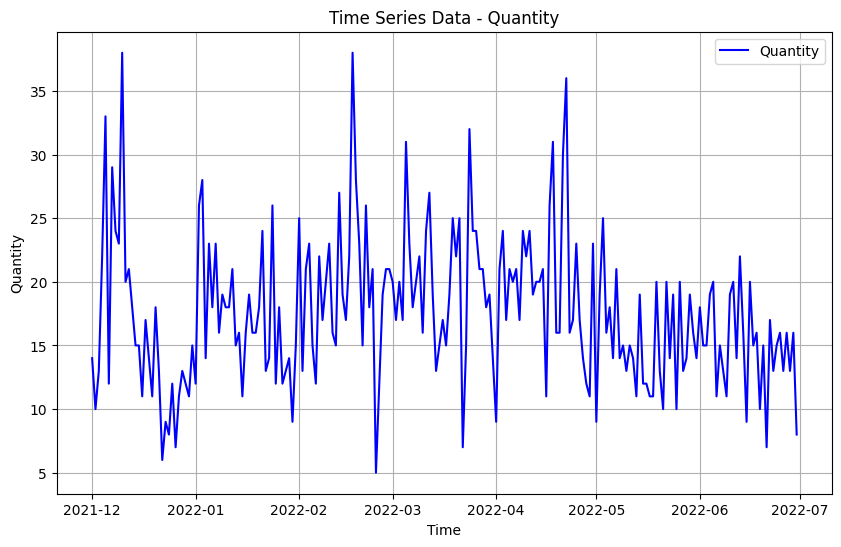

Dickey-Fuller Test Statistic: -4.445717448758575
p-value: 0.00024615679644112006
Quantity is stationary.
SARIMA Model Summary:
                                     SARIMAX Results                                      
Dep. Variable:                           Quantity   No. Observations:                  212
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -637.183
Date:                            Wed, 27 Nov 2024   AIC                           1284.365
Time:                                    00:29:37   BIC                           1300.832
Sample:                                         0   HQIC                          1291.030
                                            - 212                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------

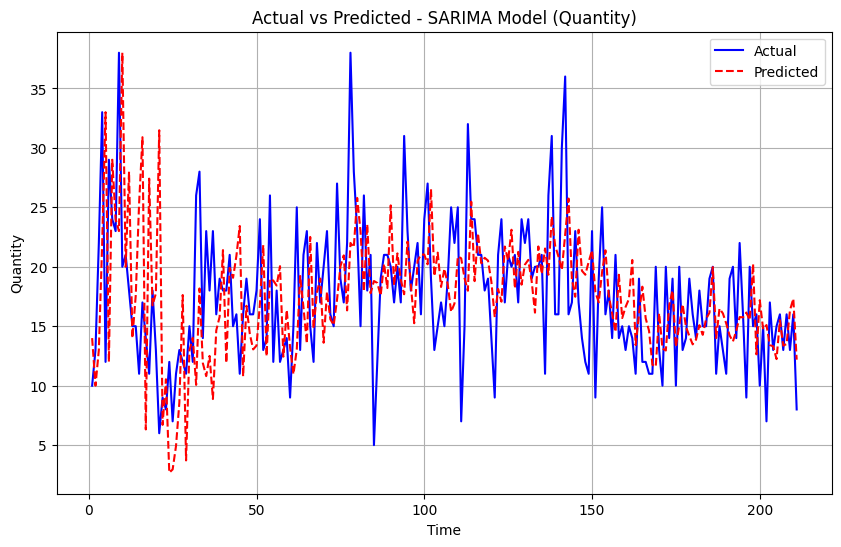


Forecasted Values for Quantity:
 212    13.572478
213    14.340756
214    13.294792
215    14.266694
216    12.020830
Name: predicted_mean, dtype: float64


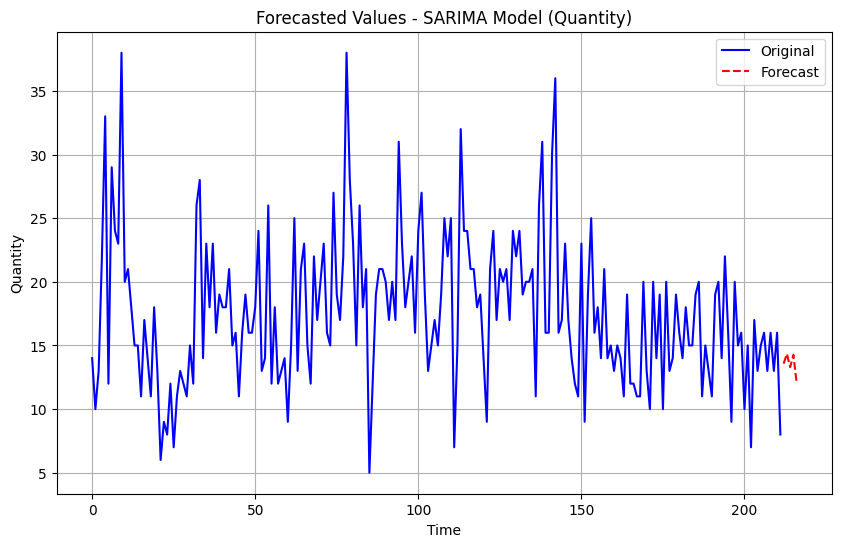

In [6]:
# Step 3: Loop through each column to conduct SARIMA Analysis
for column in time_series_columns:
    print(f"\n*** Analyzing column: {column} ***")
    time_series = data[column].dropna()  # To remove missing values

    # Display first few rows of the data
    print(f"\nFirst 5 rows of {column}:\n", time_series.head())

    # Step 4: Visualize the time series
    plt.figure(figsize=(10, 6))
    plt.plot(data["Day Index"], time_series, label=column, color="blue")
    plt.title(f"Time Series Data - {column}")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

    # Step 5: Check stationarity using the Dickey-Fuller test
    adf_test = adfuller(time_series)
    print(f"Dickey-Fuller Test Statistic: {adf_test[0]}")
    print(f"p-value: {adf_test[1]}")

    if adf_test[1] > 0.05:
        print(f"The column: {column} is non-stationary. Applying differencing...")
        time_series_diff = time_series.diff().dropna()  # Apply differencing to make stationary

        # Display first 5 rows of differenced series
        print(f"\nFirst 5 rows of differenced {column}:\n", time_series_diff.head())
    else:
        print(f"{column} is stationary.")
        time_series_diff = time_series

    # Step 6: Fit the SARIMA Model
    # Set SARIMA model parameters (p, d, q, P, D, Q, s)
    p, d, q = 1, 1, 1  # Non-seasonal parameters
    P, D, Q, s = 1, 1, 1, 12  # Seasonal parameters (s = 12 for monthly data, adjust as needed)
    sarima_model = SARIMAX(time_series_diff, order=(p, d, q), seasonal_order=(P, D, Q, s)).fit()

    # Print model summary
    print("SARIMA Model Summary:")
    print(sarima_model.summary())

    # Step 7: Make predictions
    predictions = sarima_model.predict(start=1, end=len(time_series_diff) - 1)

    # Combine actual and predicted values for comparison
    comparison = pd.DataFrame({
        "Actual": time_series_diff[1:].values,
        "Predicted": predictions
    })

    # Display a few rows of the comparison
    print(f"\nFirst 5 rows of Actual vs Predicted for {column}:\n", comparison.head())

    # Plot Actual vs Predicted
    plt.figure(figsize=(10, 6))
    plt.plot(comparison["Actual"], label="Actual", color="blue")
    plt.plot(comparison["Predicted"], label="Predicted", color="red", linestyle="--")
    plt.title(f"Actual vs Predicted - SARIMA Model ({column})")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()

    # Step 8: Forecast future values
    forecast_steps = 5  # Number of steps to forecast
    forecast = sarima_model.forecast(steps=forecast_steps)

    print(f"\nForecasted Values for {column}:\n", forecast)

    # Step 9: Display forecast results
    future_index = range(len(time_series_diff), len(time_series_diff) + forecast_steps)
    plt.figure(figsize=(10, 6))
    plt.plot(time_series_diff, label="Original", color="blue")
    plt.plot(future_index, forecast, label="Forecast", color="red", linestyle="--")
    plt.title(f"Forecasted Values - SARIMA Model ({column})")
    plt.xlabel("Time")
    plt.ylabel(column)
    plt.legend()
    plt.grid()
    plt.show()
